In [ ]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp

# Laboratorio 05: Diferenciación

---
### Profesor: Juan Marcos Marín
### Nombre: ______
*Métodos computacionales 2024-II*

---

#1.
En un cirtcuito con un voltaje de  $\varepsilon(t)$ y una inductancia de $L$, la primera ley de kirshhoff nos da la siguiente relación

\begin{equation}
\varepsilon(t) = L\frac{\mathrm{d}i}{\mathrm{d}t} + Ri
\end{equation}

donde $R$, es la resistencia del ciruito, $I$ es la corriente. Suponga que medimos la corriente con varios valores de $t$ y obtenemos:

``t = 1.00, 1.01, 1.02, 1.03, 1.04``

``i = 3.10, 3.12, 3.14, 3.18, 3.24``


donde $t$ se mide en segundos, $I$ se da en Amperios, la inductancia $L= 0.98$ H, la resistencia es de 0.142 $\Omega$. Aproxime el votaje  $\varepsilon(t)$ en los valores t=1.00, 1.01, 1.02, 1.03, 1.04 ,  para ello realice lo siguiente:


- Construya un data frame de pandas con los valores de tiempo y corriente
- Emplee el metodo de diferencias finitas y de tres puntos para calcular la derivada numérica.
- Ahora, encuentre un polinomio de interpolación usando alguno de los métodos vistos y calcule la derivada 'exacta'. Compare sus resultados.

In [2]:
import pandas as pd
import numpy as np

t = [1.00, 1.01, 1.02, 1.03, 1.04]
i = [3.10, 3.12, 3.14, 3.18, 3.24]
df = pd.DataFrame({'t': t, 'i': i})
print(df)



      t     i
0  1.00  3.10
1  1.01  3.12
2  1.02  3.14
3  1.03  3.18
4  1.04  3.24


In [3]:
#derivadas con diferencias finitas
def forward(i, h): #hacia adelante
    n = len(i)
    derivative = np.zeros(n)
    for j in range(n - 1):  # Hasta el penúltimo punto
        derivative[j] = (i[j + 1] - i[j]) / h
    derivative[-1] = np.nan  # No se puede calcular en el último punto
    return derivative

def backward(i, h): #hacia atras
    n = len(i)
    derivative = np.zeros(n)
    derivative[0] = np.nan  # No se puede calcular en el primer punto
    for j in range(1, n):  # Desde el segundo punto en adelante
        derivative[j] = (i[j] - i[j - 1]) / h
    return derivative

def centered(i, h): #centradas
    n = len(i)
    derivative = np.zeros(n)
    derivative[0] = np.nan  # No se puede calcular en el primer punto
    derivative[-1] = np.nan  # No se puede calcular en el último punto
    for j in range(1, n - 1):  # Puntos intermedios
        derivative[j] = (i[j + 1] - i[j - 1]) / (2 * h)
    return derivative





In [8]:
def three_point_derivative(df, h): #metodo de tres puntos
    i_values = df['i'].to_numpy()    # Extraer la columna 'i' como un array de NumPy

    n = len(i_values)
    derivative = np.zeros(n)

    derivative[0] = (-3 * i_values[0] + 4 * i_values[1] - i_values[2]) / (2 * h) # adelantada en el primer punto

    for j in range(1, n - 1):     # centrada en los puntos intermedios
        derivative[j] = (i_values[j + 1] - i_values[j - 1]) / (2 * h)

    derivative[-1] = (3 * i_values[-1] - 4 * i_values[-2] + i_values[-3]) / (2 * h)  # atrasada en el último punto
    return derivative




In [6]:
from scipy.interpolate import interp1d

df = pd.DataFrame({'t': t, 'i': i})
h = df['t'][1] - df['t'][0]

# derivada usando diferencias finitas
df['di_dt_forward'] = forward(df['i'], h)
df['di_dt_backward'] = backward(df['i'], h)
df['di_dt_centered'] = centered( df['i'], h)

#derivada usando el método de tres puntos
df['di_dt_three_point'] = three_point_derivative(df, h)

print(df)

      t     i  di_dt_forward  di_dt_backward  di_dt_centered  \
0  1.00  3.10            2.0             NaN             NaN   
1  1.01  3.12            2.0             2.0             2.0   
2  1.02  3.14            4.0             2.0             3.0   
3  1.03  3.18            6.0             4.0             5.0   
4  1.04  3.24            NaN             6.0             NaN   

   di_dt_three_point  
0                2.0  
1                2.0  
2                3.0  
3                5.0  
4                7.0  


In [10]:
import sympy as sp
from scipy.interpolate import lagrange

t_vals = df['t'].values
i_vals = df['i'].values

P = lagrange(t_vals, i_vals)
t_sym = sp.Symbol('t')
pol_expr = sum(coef * t_sym**i for i, coef in enumerate(P.coefficients[::-1])) # Convertir el polinomio a expresión simbólica

deriv_exacta = sp.diff(pol_expr, t_sym) #derivada exacta

df['deriv_exacta'] = [deriv_exacta.subs(t_sym, t).evalf() for t in df['t']]
print("\nDataFrame con la derivada exacta:")

from tabulate import tabulate
print(tabulate(df, headers='keys', tablefmt='grid'))




DataFrame con la derivada exacta:
+----+------+------+-----------------+------------------+------------------+---------------------+----------------+
|    |    t |    i |   di_dt_forward |   di_dt_backward |   di_dt_centered |   di_dt_three_point |   deriv_exacta |
+====+======+======+=================+==================+==================+=====================+================+
|  0 | 1    | 3.1  |               2 |              nan |              nan |                   2 |        3.16667 |
+----+------+------+-----------------+------------------+------------------+---------------------+----------------+
|  1 | 1.01 | 3.12 |               2 |                2 |                2 |                   2 |        1.5     |
+----+------+------+-----------------+------------------+------------------+---------------------+----------------+
|  2 | 1.02 | 3.14 |               4 |                2 |                3 |                   3 |        2.83333 |
+----+------+------+-----------------




En comparacion con la derivada exacta podemos decir que varios de los metodos se acercan muy bien al resultado, en especial  en diferencias finitas centradas y método de tres puntos que dan resultados idénticos para los puntos intermedios.

 se puede notar que para valores en los extremos se hace mas complejo el obtener un buen valor o de entrada el poder calcularlo, como es el caso de las diferencias finitas centradas no pueden calcularse en los extremos.

# 2.

Usando la siguiente tabla, determinar la velocidad instantanea para cada uno de los tiempo y distancias mostrados.

* ¿Cuál será la velocidad para $t=12$?

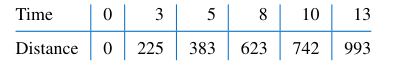



In [11]:
t = [0,3,5,8,10,13]
d = [0,225,383,623,742,993]

In [12]:
import numpy as np
def backward(i, t):
    n = len(i)
    derivative = np.zeros(n)

    derivative[0] = np.nan  # No se puede calcular en el primer punto
    for j in range(1, n):  # Desde el segundo punto en adelante
        derivative[j] = (i[j] - i[j - 1]) / (t[j] - t[j - 1])
    return derivative

t = np.array([0, 3, 5, 8, 10, 13])
d = np.array([0, 225, 383, 623, 742, 993])
velocities = backward(d, t)

for i in range(len(t)):
    if not np.isnan(velocities[i]):
        print(f"v({t[i]}) ≈ {velocities[i]:.2f} m/s")

#aproximacion para t=12
t1, t2 = 10, 13
v1, v2 = velocities[4], velocities[5]  # Velocidades en t = 10 y t = 13
v_12 = v1 + (12 - t1) * (v2 - v1) / (t2 - t1)

print(f"v(12) ≈ {v_12:.2f} m/s")



v(3) ≈ 75.00 m/s
v(5) ≈ 79.00 m/s
v(8) ≈ 80.00 m/s
v(10) ≈ 59.50 m/s
v(13) ≈ 83.67 m/s
v(12) ≈ 75.61 m/s


# 3.

Para un cohete, se recabaron los datos siguientes de la distancia
recorrida $y$ versus el tiempo $t$:

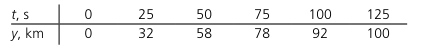

Use diferenciación numérica para estimar la velocidad y aceleración
del cohete en cada momento.

In [16]:
import numpy as np

def derivada_cohete(y, t): # diferencias finitas centradas
    n = len(y)
    v = np.zeros(n)
    v[0] = (y[1] - y[0]) / (t[1] - t[0])   # Diferencias hacia adelante en el primer punto

    for i in range(1, n - 1):   # Diferencias centradas en los puntos intermedios
        v[i] = (y[i + 1] - y[i - 1]) / (t[i + 1] - t[i - 1])

    v[-1] = (y[-1] - y[-2]) / (t[-1] - t[-2])     # Diferencias hacia atrás en el último punto

    return v

def aceleracion_cohete(v, t):
    n = len(v)
    a = np.zeros(n)

    a[0] = (v[1] - v[0]) / (t[1] - t[0])
    for i in range(1, n - 1):
        a[i] = (v[i + 1] - v[i - 1]) / (t[i + 1] - t[i - 1])
    a[-1] = (v[-1] - v[-2]) / (t[-1] - t[-2])

    return a




In [18]:

t = np.array([0, 25, 50, 75, 100, 125])  # Tiempo en segundos
y = np.array([0, 32, 58, 78, 92, 100])  # Posición en metros

velocidades = derivada_cohete(y, t)
aceleraciones = aceleracion_cohete(velocidades, t)

# Imprimir resultados
print("Tiempo (t) | Velocidad (v) | Aceleración (a)")
for i in range(len(t)):
    print(f"{t[i]:>9} | {velocidades[i]:>10.2f} | {aceleraciones[i]:>11.2f}")

Tiempo (t) | Velocidad (v) | Aceleración (a)
        0 |       1.28 |       -0.00
       25 |       1.16 |       -0.01
       50 |       0.92 |       -0.01
       75 |       0.68 |       -0.01
      100 |       0.44 |       -0.01
      125 |       0.32 |       -0.00


#4.
El potencial eléctrico de un anillo de radio $R$, en su parte superior $z$ viene dado por:


\begin{equation}
V = \frac{kq_{tot}}{\sqrt{z^2+R^2}}
\end{equation}

Calcule el campo eléctrico para $z>0$ y $R=0.1$ mm. Reescale el problema en unidades de $kq_{tot}$ empleando:

**a.** La librearia sympy.

**b.** Calcular el campo en el punto  $z = 0.1$ mm empleando el metodo np.grad

**c.** Calcular el campo para diferentes valores de $z$ con $z>0$,  empleando np.grad Construya un gráfico de $E$ vs $z$.

---
Recuerde que la componente $z$ del campo electrico esta dado por:

\begin{equation}
E_z = - \frac{\partial V}{\partial z}
\end{equation}

In [22]:
z, R, kq_tot = sp.symbols('z R kq_tot') #variables simbolicas

V = kq_tot / sp.sqrt(z**2 + R**2) #potencial

E_z = -sp.diff(V, z) #campo electrico

E_z_simplified = sp.simplify(E_z)
E_z_simplified



kq_tot*z/(R**2 + z**2)**(3/2)

In [23]:
R = 0.1
z_vals = np.array([0.09, 0.1, 0.11])  # mm (puntos cercanos para derivación)
V_vals = (1 / np.sqrt(z_vals**2 + R**2))  # Potencial escalado en unidades de kq_tot

#  derivada numérica usando np.gradient
E_vals = -np.gradient(V_vals, z_vals)

#Resultado en z = 0.1 mm
E_at_z_01 = E_vals[1]
print(f"E_z en z=0.1 mm ≈ {E_at_z_01:.3f} en unidades de kq_tot")


E_z en z=0.1 mm ≈ 35.31068 en unidades de kq_tot


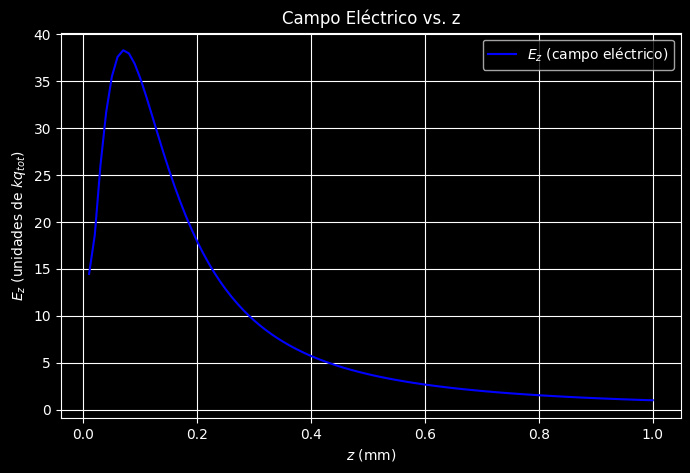

In [24]:
import matplotlib.pyplot as plt

z_vals = np.linspace(0.01, 1, 100)  # mm, desde 0.01 hasta 1 mm
V_vals = 1 / np.sqrt(z_vals**2 + R**2)  # Potencial escalado en unidades de kq_tot

E_vals = -np.gradient(V_vals, z_vals)

# Graficar
plt.style.use("dark_background")
plt.figure(figsize=(8, 5))
plt.plot(z_vals, E_vals, label=r'$E_z$ (campo eléctrico)', color= 'blue')
plt.xlabel(r'$z$ (mm)')
plt.ylabel(r'$E_z$ (unidades de $kq_{tot}$)')
plt.title('Campo Eléctrico vs. z')
plt.legend()
plt.grid()
plt.show()
